<a href="https://colab.research.google.com/github/YashVarshney24/COG_Practice/blob/main/AAPL_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np

Loading APPLE STOCK PRICE data for 20 Years 01/01/2002 - 31/05/2022

In [2]:
data = pd.read_csv('AAPL_20_years.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2002,0.393750,0.416071,0.392143,0.416071,0.355748,529496800
1,1/3/2002,0.410714,0.424107,0.406607,0.421071,0.360023,612007200
2,1/4/2002,0.416786,0.427679,0.410536,0.423036,0.361703,409976000
3,1/7/2002,0.423571,0.428571,0.406250,0.408929,0.349642,444584000
4,1/8/2002,0.406250,0.411607,0.401071,0.403750,0.345214,450038400


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5134,5/24/2022,140.809998,141.970001,137.330002,140.360001,140.360001,104132700
5135,5/25/2022,138.429993,141.789993,138.339996,140.520004,140.520004,92482700
5136,5/26/2022,137.389999,144.339996,137.139999,143.779999,143.779999,90601500
5137,5/27/2022,145.389999,149.679993,145.259995,149.639999,149.639999,90978500
5138,5/31/2022,149.070007,150.660004,146.839996,148.839996,148.839996,103718400


In [5]:
df = data.reset_index()['Close']

In [6]:
df.shape

(5139,)

In [7]:
import matplotlib.pyplot as plt

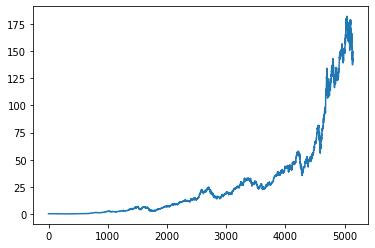

In [8]:
plt.plot(df)

DATA PREPROCESSING

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [10]:
df.shape

(5139, 1)

In [11]:
df

array([[0.00100005],
       [0.00102756],
       [0.00103837],
       ...,
       [0.78968589],
       [0.82192342],
       [0.81752238]])

Train-Test Split

In [12]:
training_size = int(len(df)*0.65)
test_size = int(len(df)) - training_size

In [13]:
training_size,test_size

(3340, 1799)

In [14]:
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [15]:
train_data

array([[0.00100005],
       [0.00102756],
       [0.00103837],
       ...,
       [0.17201537],
       [0.17145148],
       [0.17277178]])

In [16]:
def create_dataset(dataset, time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.00100005 0.00102756 0.00103837 ... 0.00110026 0.00118474 0.00108356]
 [0.00102756 0.00103837 0.00096076 ... 0.00118474 0.00108356 0.00106685]
 [0.00103837 0.00096076 0.00093227 ... 0.00108356 0.00106685 0.00106685]
 ...
 [0.1486349  0.14838734 0.14958386 ... 0.16984235 0.16959479 0.17106639]
 [0.14838734 0.14958386 0.15171562 ... 0.16959479 0.17106639 0.17385829]
 [0.14958386 0.15171562 0.15387487 ... 0.17106639 0.17385829 0.17201537]]


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

CREATING DEEP LEARNING ARCHITECTURE With LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(60, return_sequences=True))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 lstm_2 (LSTM)               (None, 100, 75)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                25200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 103,091
Trainable params: 103,091
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss = 'mse', optimizer = 'adam')

Training the dataset

In [24]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('BestST.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 60, batch_size=10, callbacks=callbacks_list, verbose = 1)

Epoch 1/60
324/324 [==============================] - ETA: 0s - loss: 8.7039e-05
Epoch 1: val_loss improved from inf to 0.00521, saving model to BestST.h5
324/324 [==============================] - 65s 175ms/step - loss: 8.7039e-05 - val_loss: 0.0052
Epoch 2/60
324/324 [==============================] - ETA: 0s - loss: 2.4889e-05
Epoch 2: val_loss did not improve from 0.00521
324/324 [==============================] - 46s 142ms/step - loss: 2.4889e-05 - val_loss: 0.0072
Epoch 3/60
324/324 [==============================] - ETA: 0s - loss: 2.3845e-05
Epoch 3: val_loss improved from 0.00521 to 0.00302, saving model to BestST.h5
324/324 [==============================] - 47s 145ms/step - loss: 2.3845e-05 - val_loss: 0.0030
Epoch 4/60
324/324 [==============================] - ETA: 0s - loss: 1.5921e-05
Epoch 4: val_loss did not improve from 0.00302
324/324 [==============================] - 48s 149ms/step - loss: 1.5921e-05 - val_loss: 0.0039
Epoch 5/60
324/324 [==========================

Loading the best saved model 

In [46]:
from keras.models import load_model
model = load_model('BestST.h5')

In [59]:
x_input=test_data[1699:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.9449321636258889,
 0.9458673710908203,
 0.9459774187980198,
 0.9618761327455474,
 0.9643516945380198,
 0.9459774187980198,
 0.9508185771950419,
 0.9328293529032528,
 0.913189726576723,
 0.9037275106983628,
 0.8921748614937322,
 0.8878287967508353,
 0.8777064541665465,
 0.8772113550111361,
 0.8746257455114642,
 0.9357450285065315,
 0.9602257307108069,
 0.9592905232458755,
 0.9660570764160793,
 0.9498832872108339,
 0.9470776593147546,
 0.9430617486960261,
 0.9605008114698097,
 0.9684776583652328,
 0.9455922903318175,
 0.9264478401786895,
 0.9277681816111084,
 0.9492781403482243,
 0.9479578869363672,
 0.9277681816111084,
 0.919076140145876,
 0.9026823325442234,
 0.879301870856683,
 0.8939902910789911,
 0.9055980081475022,
 0.9070832946111627,
 0.8965208382160675,
 0.9150051616632671,
 0.913189726576723,
 0.8963558051642642,
 0.8750658593222705,
 0.8648334635294971,
 0.8951455169403298,
 0.8707748624432541,
 0.8499249478927902,
 0.8273146606183777,
 0.8519054105298525,
 0.87666119349313

Prediction of STOCK VALUE next 20 days

In [61]:
lst_output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8146774172782898], [0.8191041350364685], [0.818483829498291], [0.8166226148605347], [0.8148995637893677], [0.813758373260498], [0.8133997917175293], [0.8138754963874817], [0.815093457698822], [0.816861629486084], [0.8189448714256287], [0.8211194276809692], [0.823203980922699], [0.8250777721405029], [0.826679527759552], [0.8280008435249329], [0.8290700912475586], [0.8299369812011719], [0.8306587338447571], [0.831287145614624]]


In [63]:
out = scaler.inverse_transform(lst_output)

In [64]:
out = out[0:19]

In [65]:
out

array([[148.32285113],
       [149.12752089],
       [149.01476441],
       [148.6764408 ],
       [148.36323197],
       [148.15579125],
       [148.09060984],
       [148.17708139],
       [148.39847717],
       [148.71988785],
       [149.09857064],
       [149.49385214],
       [149.87277328],
       [150.21338301],
       [150.50454327],
       [150.74472638],
       [150.93908965],
       [151.09666918],
       [151.22786628]])

Loading the real dataset values for next 20 days  

In [66]:
data = pd.read_csv('last 20 days.csv')
data = data.dropna()

In [67]:
value = data['Close']

In [68]:
result = np.array(value)

In [69]:
result

array([148.710007, 151.210007, 145.380005, 146.139999, 148.710007,
       147.960007, 142.639999, 137.130005, 131.880005, 132.759995,
       135.429993, 130.059998, 131.559998, 135.869995, 135.350006,
       138.270004, 141.660004, 141.660004, 137.440002])

Finding the Root Mean Squared Error for the 20 days prediction

In [70]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(result,out))
rmse

11.60704548637187